# Proyek Akhir: Menyelesaikan Permasalahan departemen Human Resources (HR Analytics)

- Nama: Fikri Kurnia
- Email: ds.fikri.kurnia@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 50)

### Menyiapkan data yang akan diguankan

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv")

## Data Understanding

The data contains demographic details, work-related metrics and attrition flag.

- EmployeeId - Employee Identifier
- Attrition - Did the employee attrition? (0=no, 1=yes)
- Age - Age of the employee
- BusinessTravel - Travel commitments for the job
- DailyRate - Daily salary
- Department - Employee Department
- DistanceFromHome - Distance from work to home (in km)
- Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
- EducationField - Field of Education
- EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- Gender - Employee's gender
- HourlyRate - Hourly salary
- JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
- JobLevel - Level of job (1 to 5)
- JobRole - Job Roles
- JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- MaritalStatus - Marital Status
- MonthlyIncome - Monthly salary
- MonthlyRate - Mounthly rate
- NumCompaniesWorked - Number of companies worked at
- Over18 - Over 18 years of age?
- OverTime - Overtime?
- PercentSalaryHike - The percentage increase in salary last year
- PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- StandardHours - Standard Hours
- StockOptionLevel - Stock Option Level
- TotalWorkingYears - Total years worked
- TrainingTimesLastYear - Number of training attended last year
- WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- YearsAtCompany - Years at Company
- YearsInCurrentRole - Years in the current role
- YearsSinceLastPromotion - Years since the last promotion
- YearsWithCurrManager - Years with the current manager

In [3]:
data

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,3,Female,81,3,3,Manufacturing Director,3,Single,7861,15397,4,Y,Yes,14,3,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,4,Female,50,2,3,Research Director,1,Divorced,13269,21981,5,Y,No,15,3,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,3,Female,79,3,1,Laboratory Technician,4,Married,2515,22955,1,Y,Yes,11,3,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,3,Male,74,3,1,Research Scientist,3,Divorced,3544,8532,9,Y,No,16,3,2,80,1,6,0,3,4,2,0,0


In [4]:
data.dtypes

,0
EmployeeId,int64
Age,int64
Attrition,float64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64


In [5]:
data['Attrition'].isnull().sum()

np.int64(412)

In [6]:
data['Attrition'].value_counts()

,count
Attrition,
0.0,879
1.0,179


Terdapat total 412 data pekerja yang tidak memiliki keterangan pada kolom "Attrition".Informasi ini akan ditinjau lebih lanjut

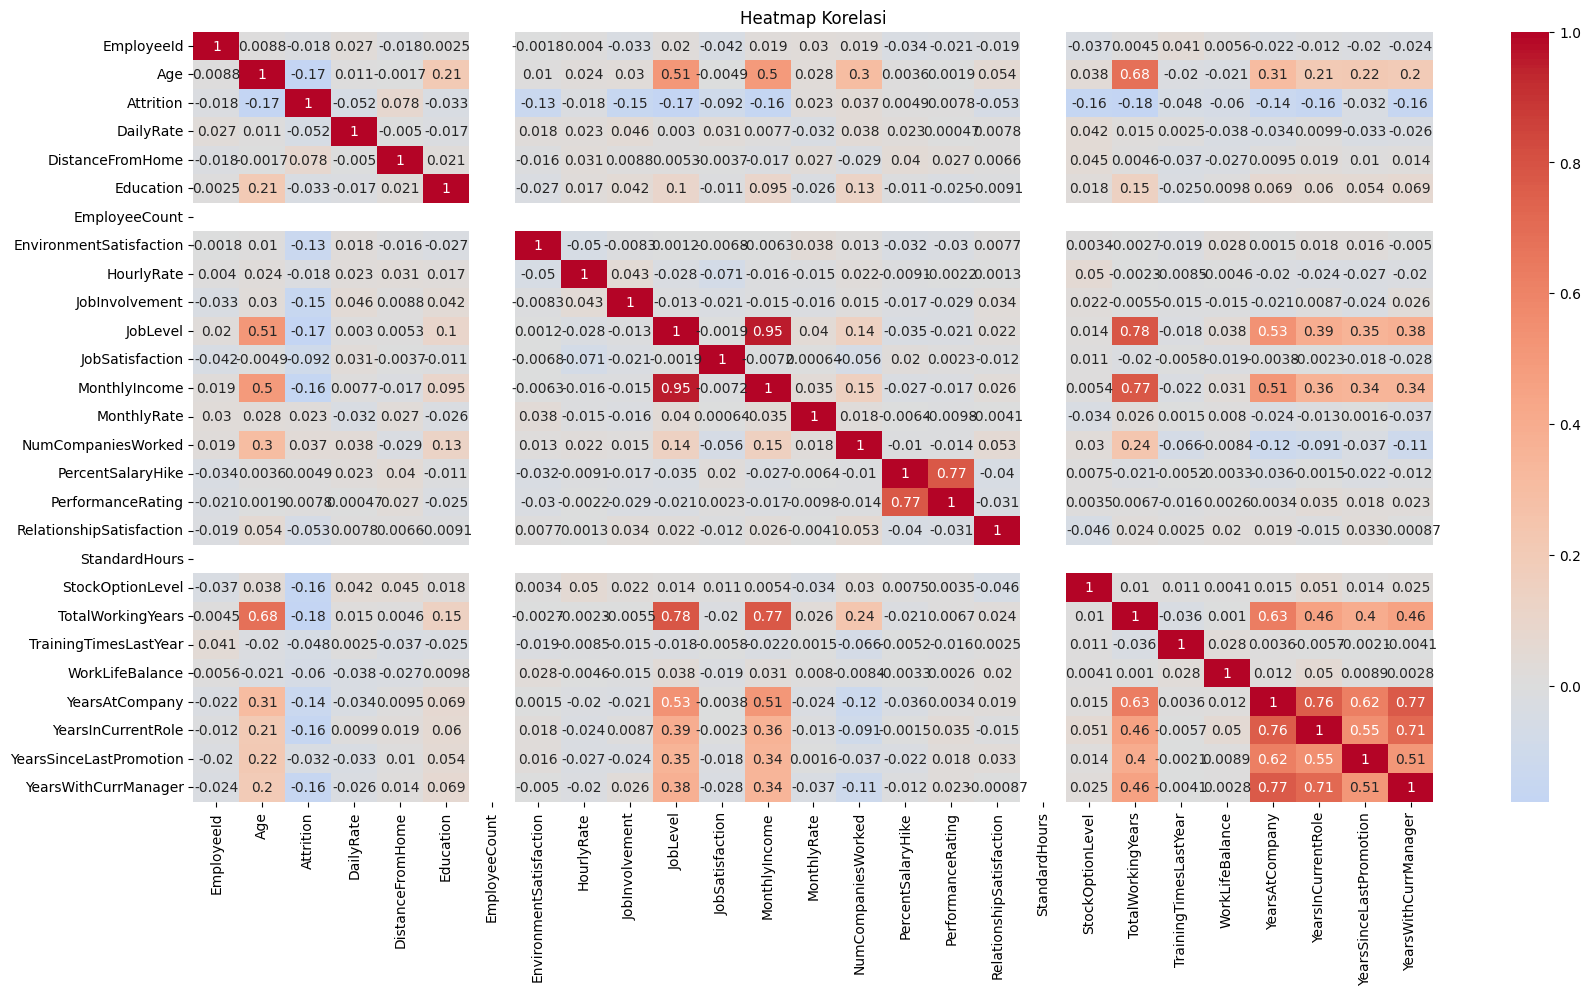

In [7]:
corr = data.select_dtypes(np.number).corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi")
plt.show()

Dapat dilihat berdasarkan hetmap di atas terdapat beberapa fitur yang memiliki korelasi yang cukup tinggi yang mana menunjukan fitur tersebut berkemungkinan terindikasi redundant atau membentuk suatu cluster.

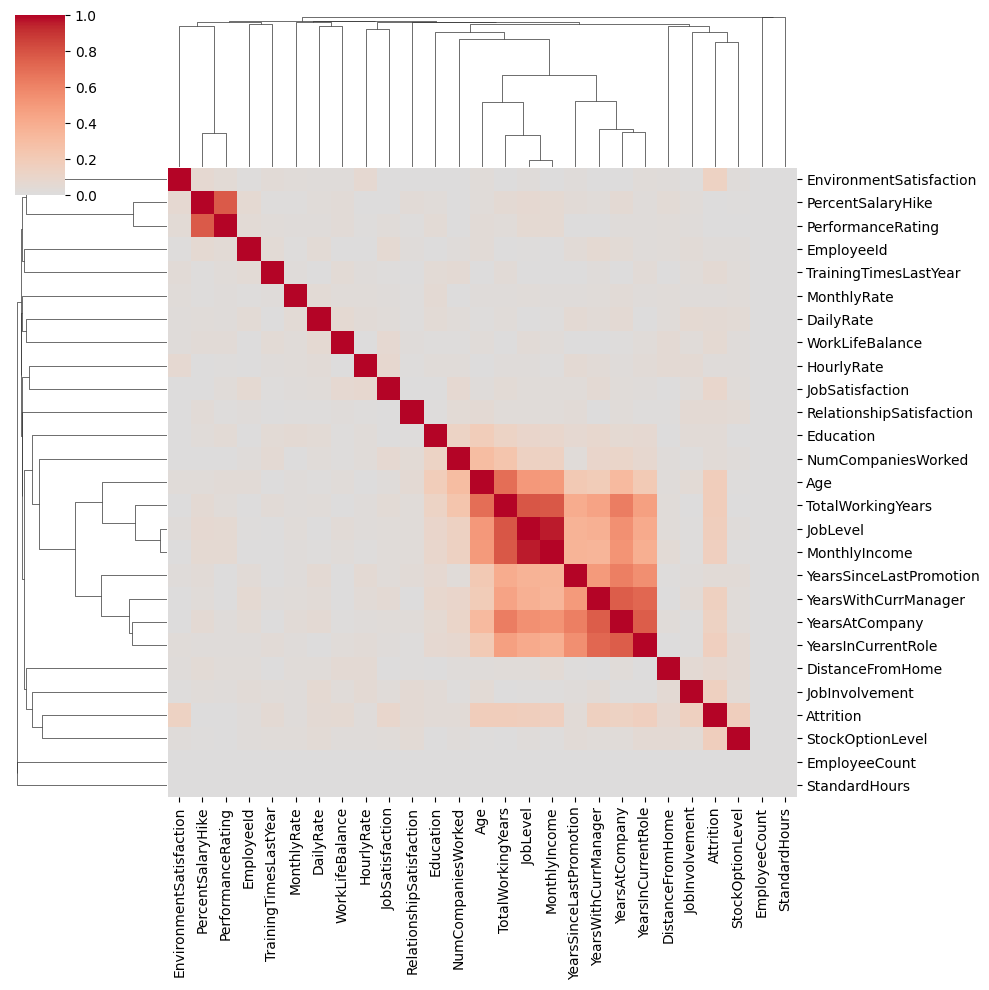

In [8]:
# Hapus baris NaN di target
data_nonNa = data.dropna(subset=["Attrition"])

num = data_nonNa.select_dtypes(include=["int64", "float64"]).copy()
corr = num.corr().abs().fillna(0)
dist = 1 - corr
np.fill_diagonal(dist.values, 0)
link = linkage(squareform(dist.values, checks=False), method="average")

# Plot clustermap
sns.clustermap(
    corr,
    row_linkage=link,
    col_linkage=link,
    cmap="coolwarm",
    center=0,
    figsize=(10, 10)
)
plt.show()

# Dapatkan cluster fitur
labels = fcluster(link, t=0.7, criterion="distance")
clusters = pd.Series(labels, index=corr.columns).groupby(labels).apply(list)

Dari potongan heatmap, terlihat fitur-fitur seperti:
- Age
- ToalWorkingYears
- JobLevel
- MontlyIncome
- YearsAtCompany
- YearsInCurrentRole
- YearsWithCurrManager
- YearsSinceLastPromotion

Semua ini berhubungan dengan senioritas/masa kerja karyawan di perusahaan.

## Univariate Analysis

### Feature Numeric

In [9]:
# Fitur Numerik
num_fe = data.select_dtypes(np.number).columns

### Helper Function for Visualization (Numeric)

In [10]:
def numeric_analysis(df: pd.DataFrame, feature: list[str], target=None, bins=30)->None:
    """
    Helper function untuk univariate atau bivariate analysis pada fitur numerik.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataset
    feature : str
        Nama kolom numerik yang akan dianalisis
    target : str, optional
        Kolom target (misalnya 'Attrition'), default None
    bins : int
        Jumlah bin untuk histogram
    """

    fig, axes = plt.subplots(1, 3 if target else 2, figsize=(15, 4))

    sns.histplot(df[feature].dropna(), bins=bins, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {feature}")

    sns.boxplot(x=df[feature], ax=axes[1])
    axes[1].set_title(f"Boxplot of {feature}")

    if target:
        sns.boxplot(x=df[target], y=df[feature], ax=axes[2])
        axes[2].set_title(f"{feature} by {target}")

    plt.tight_layout()
    plt.show()

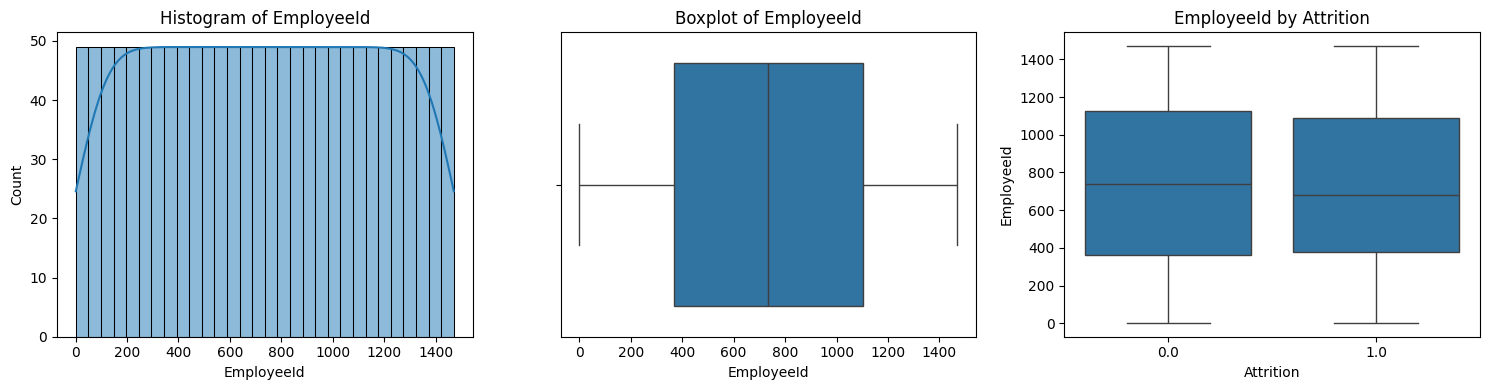

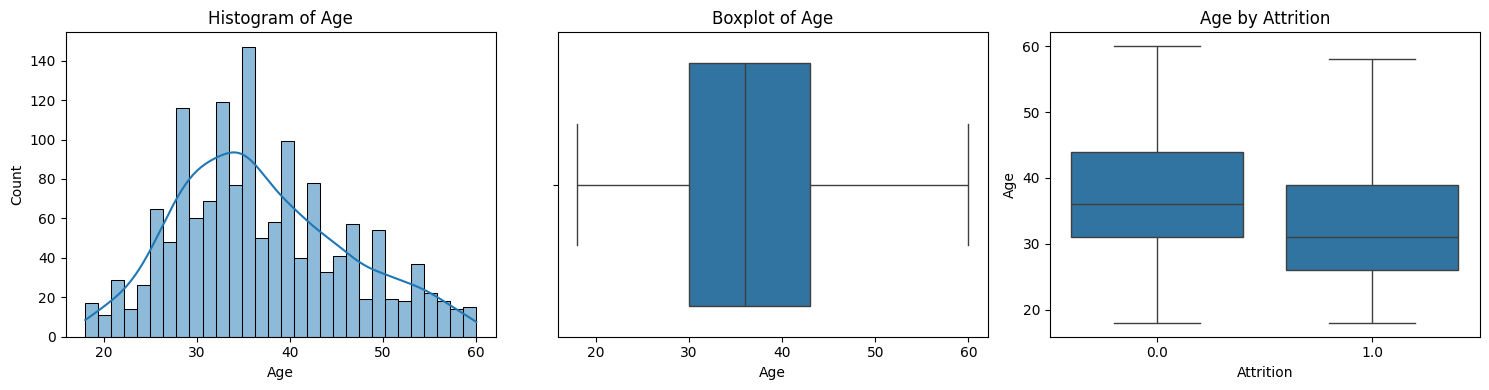

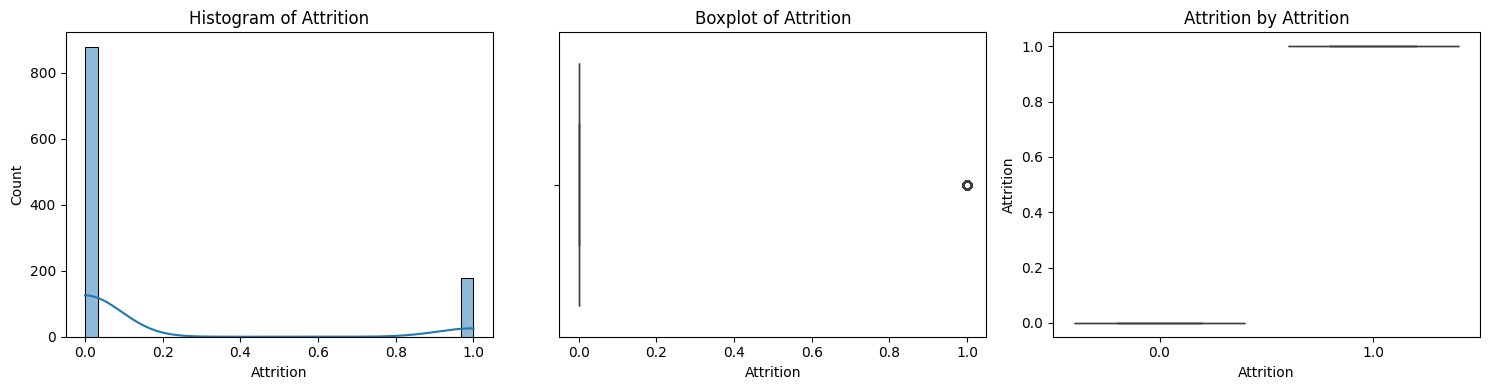

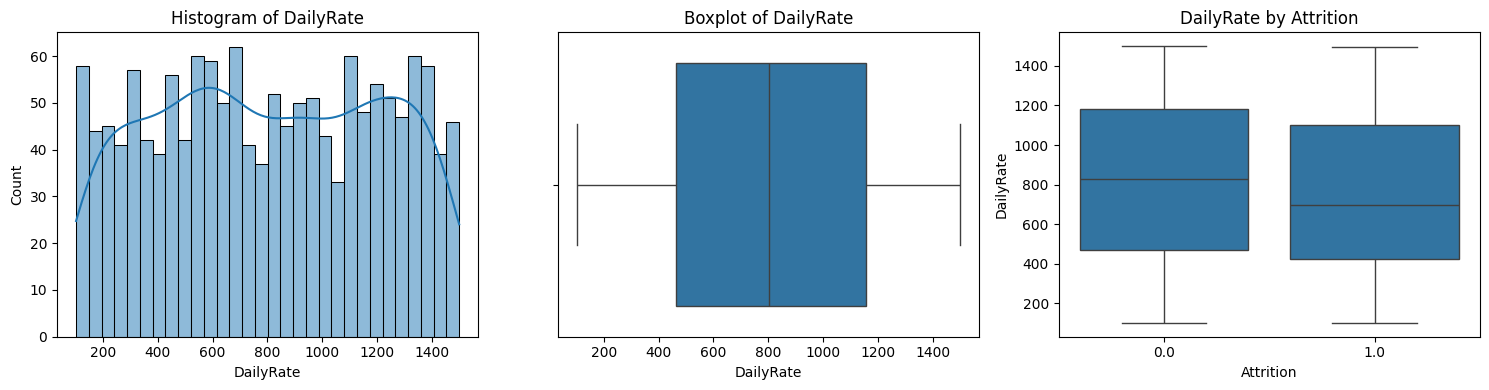

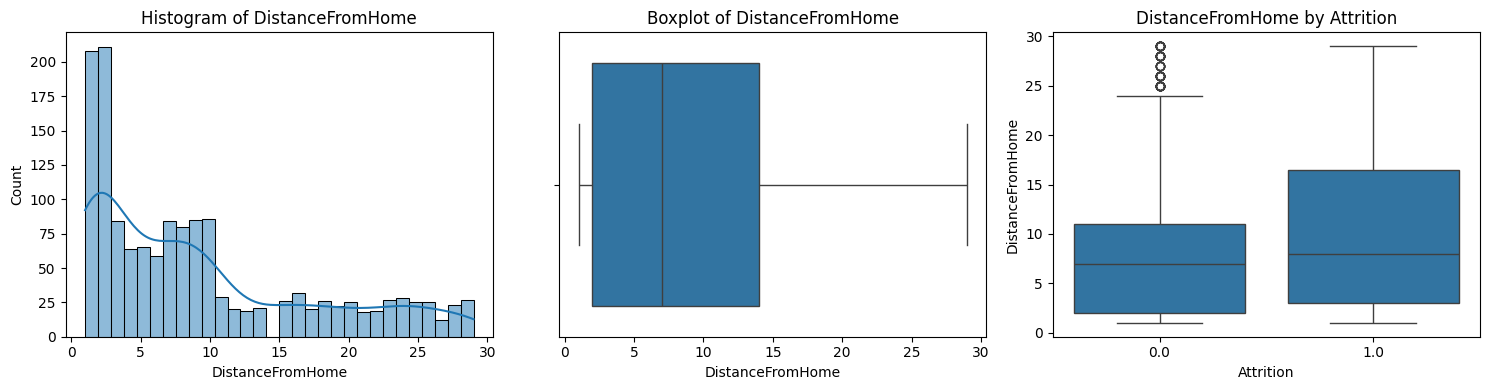

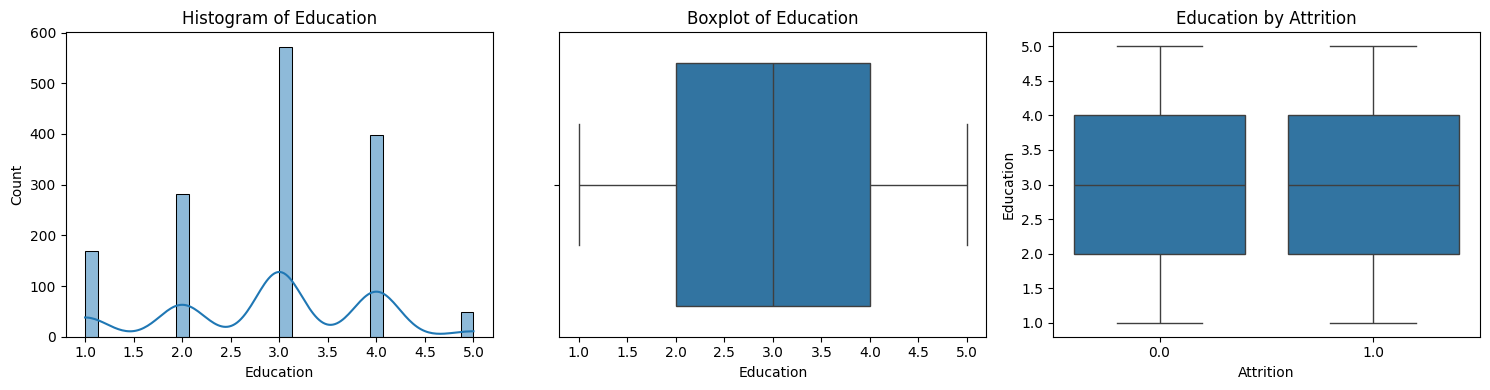

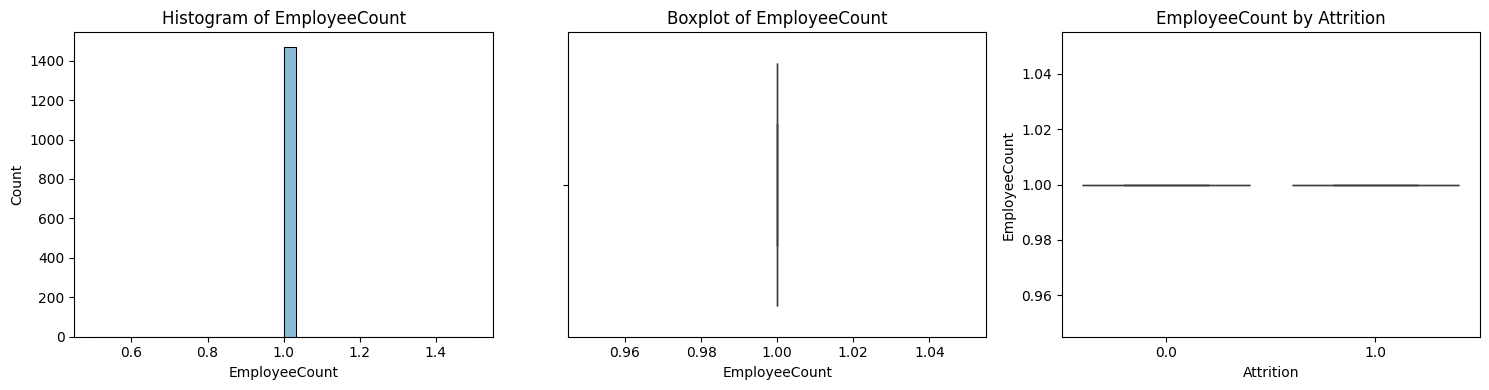

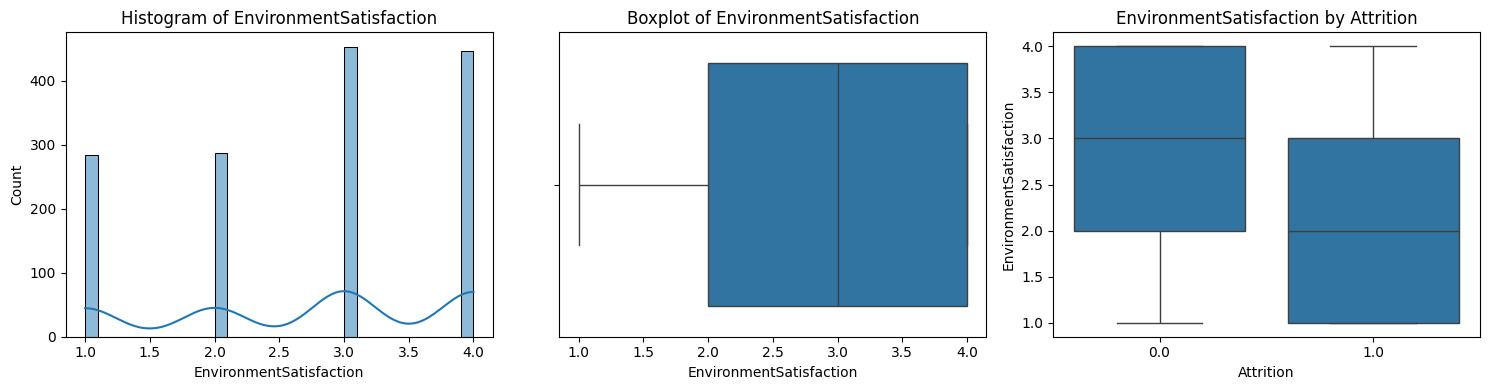

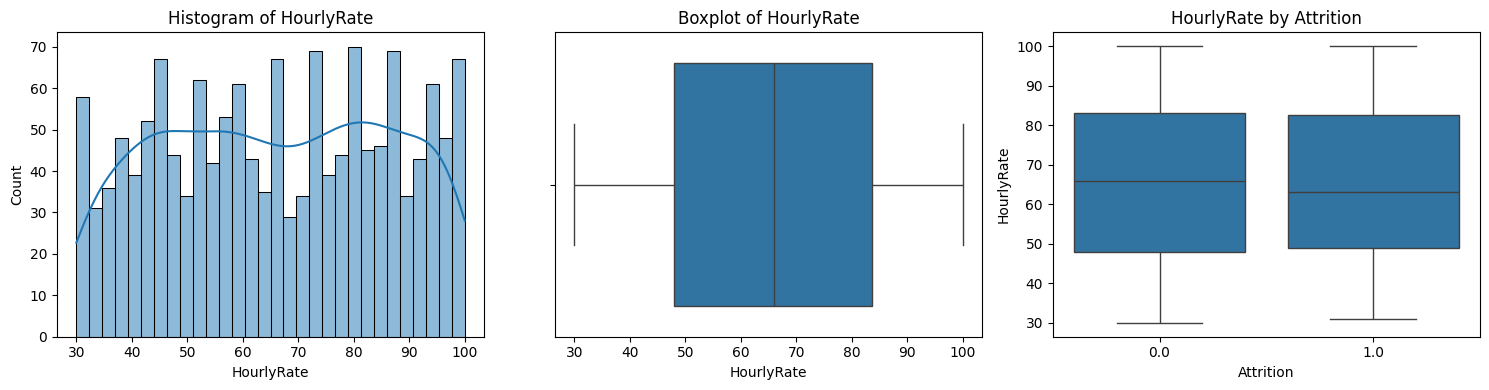

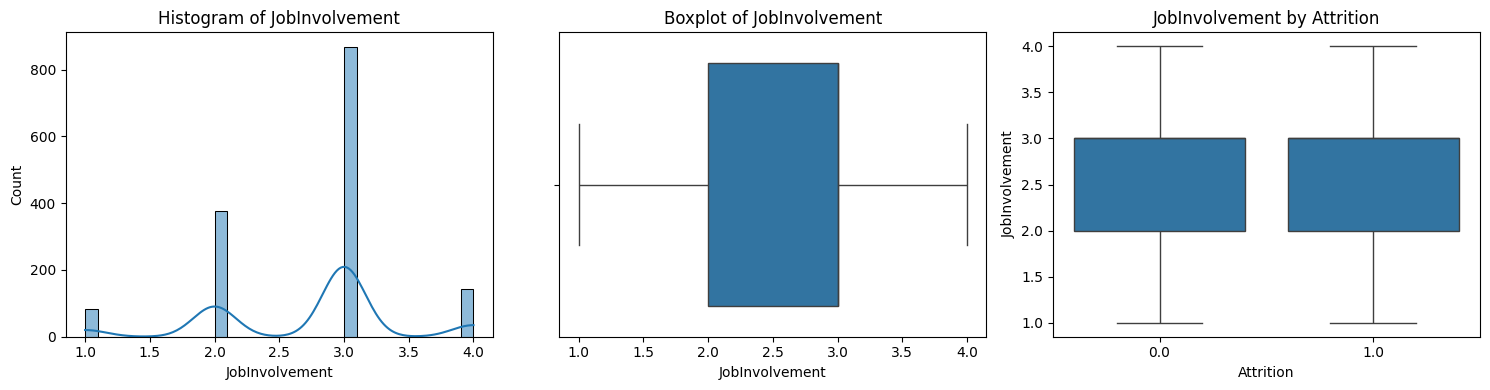

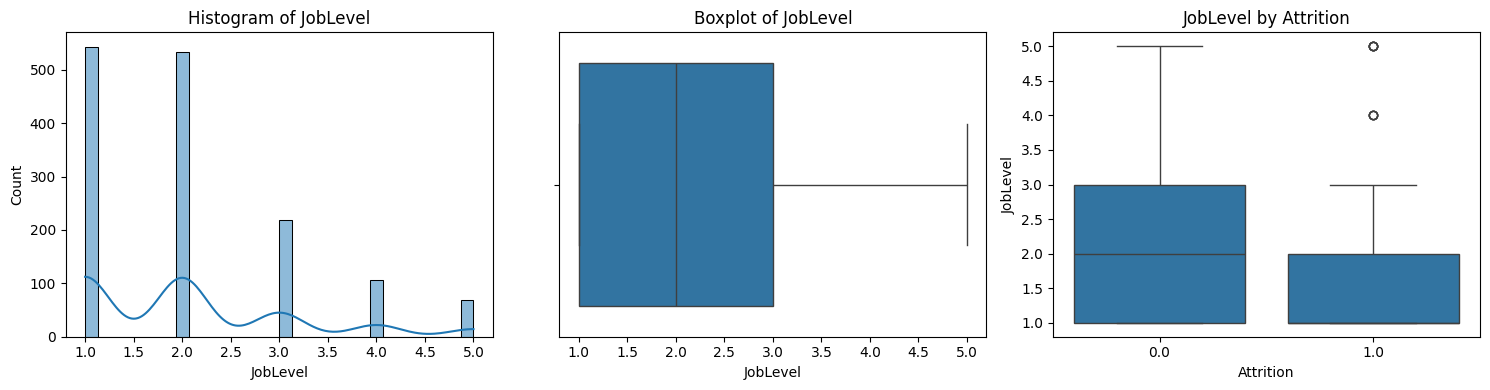

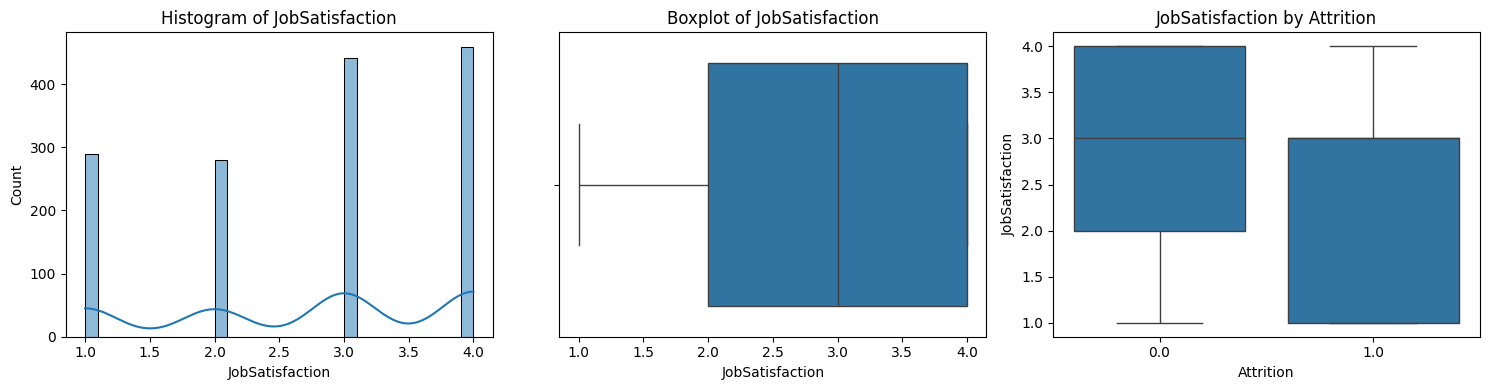

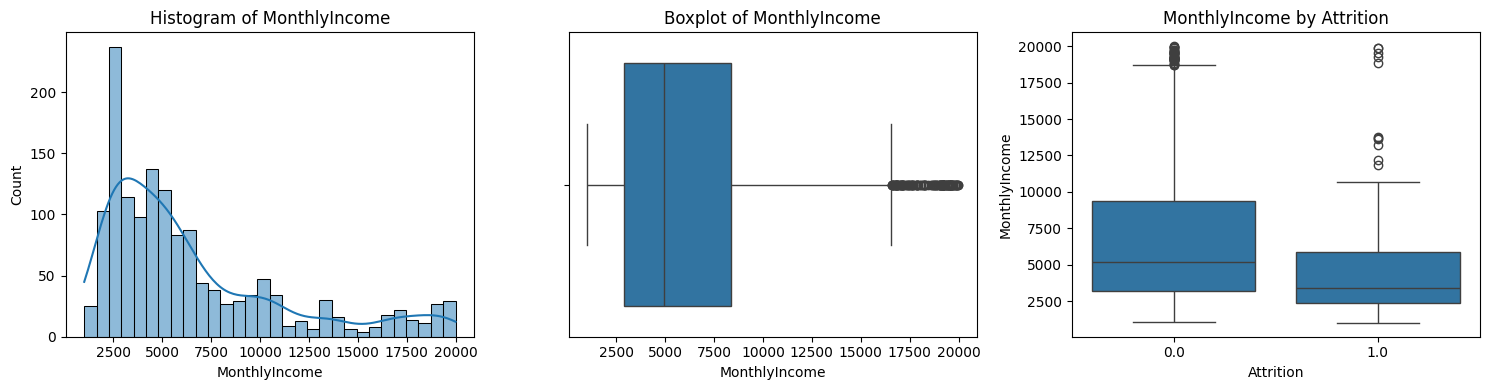

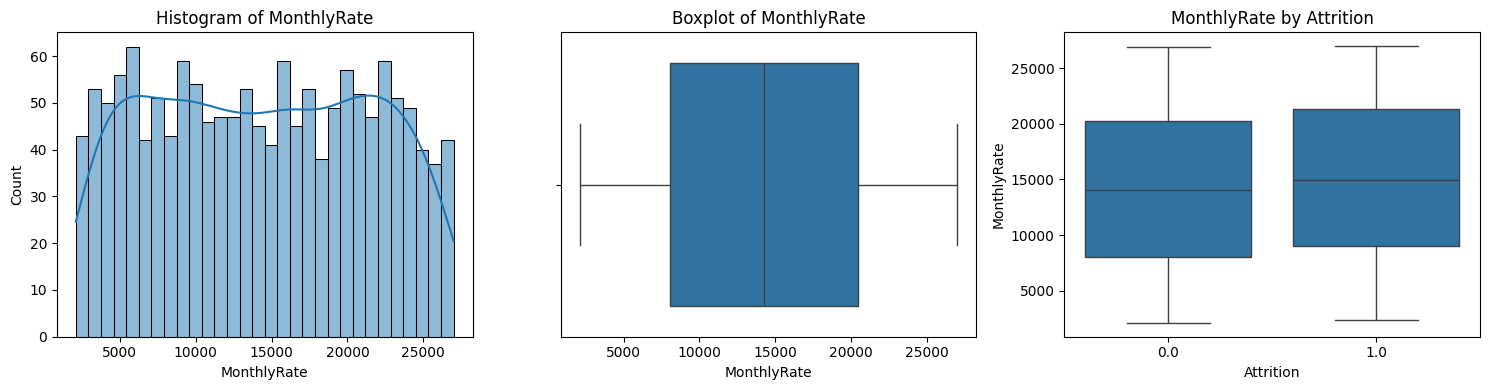

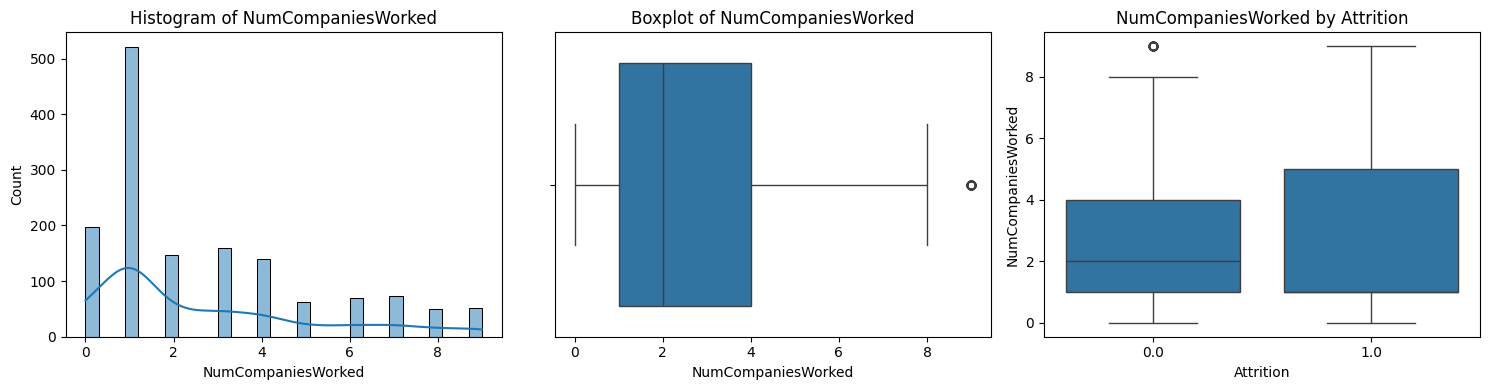

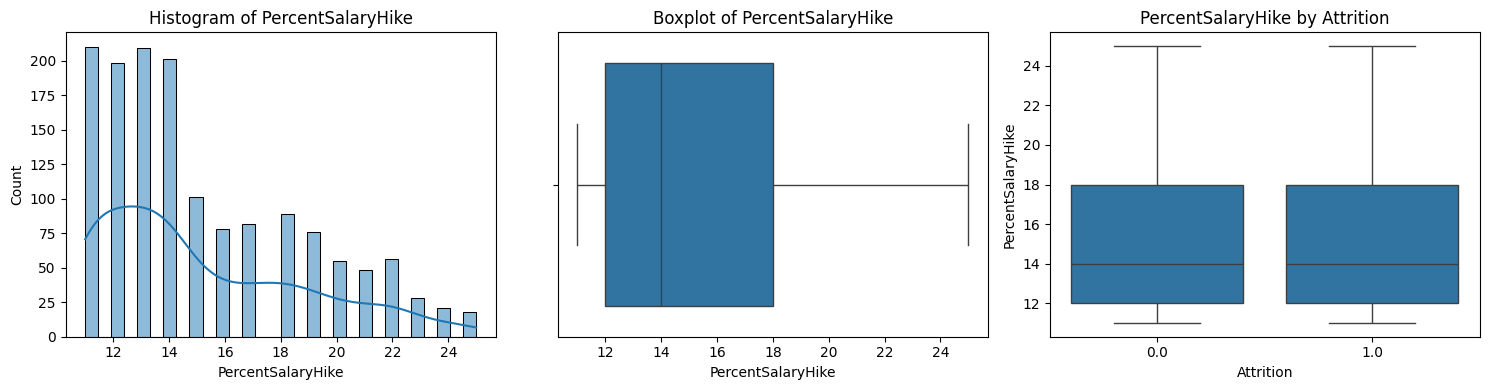

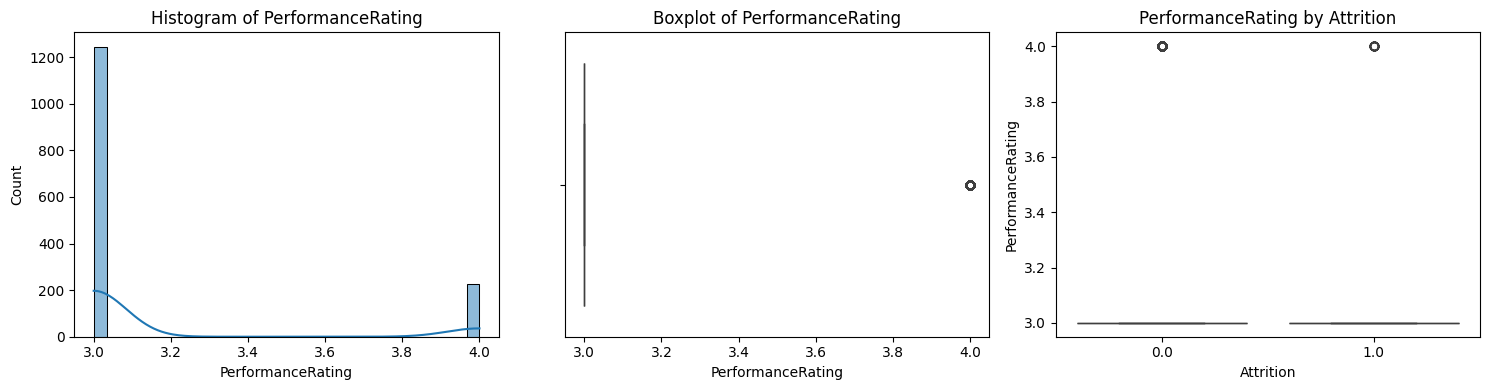

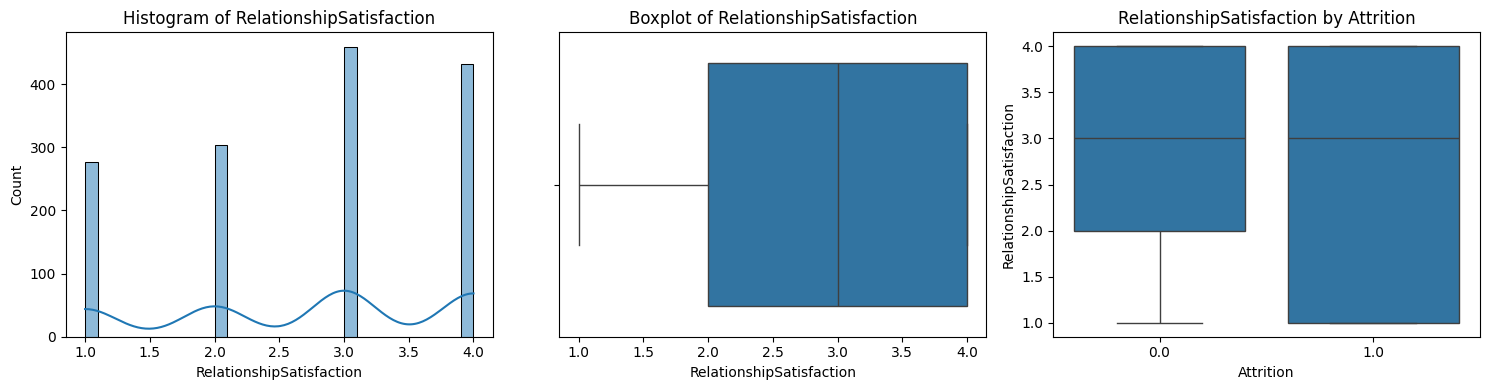

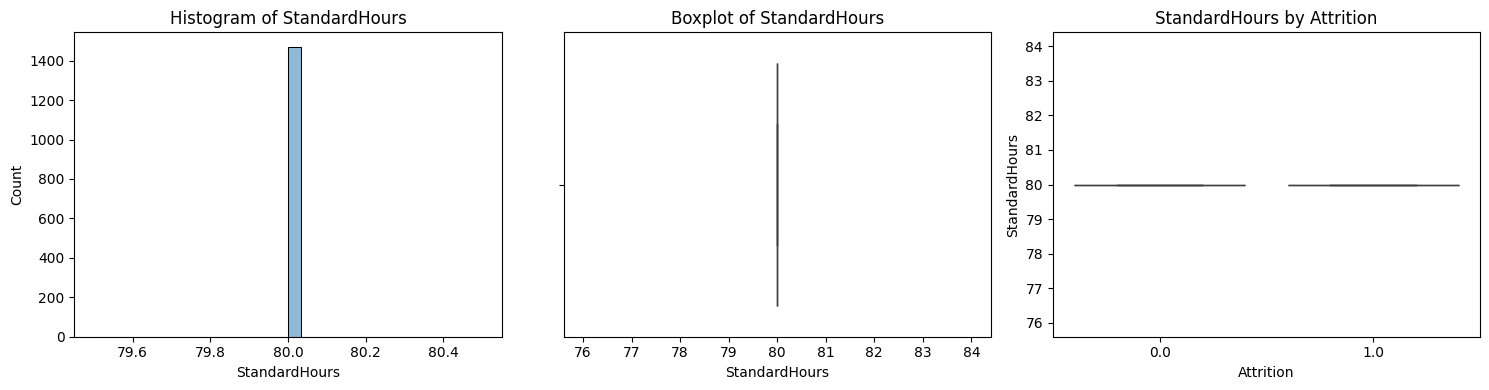

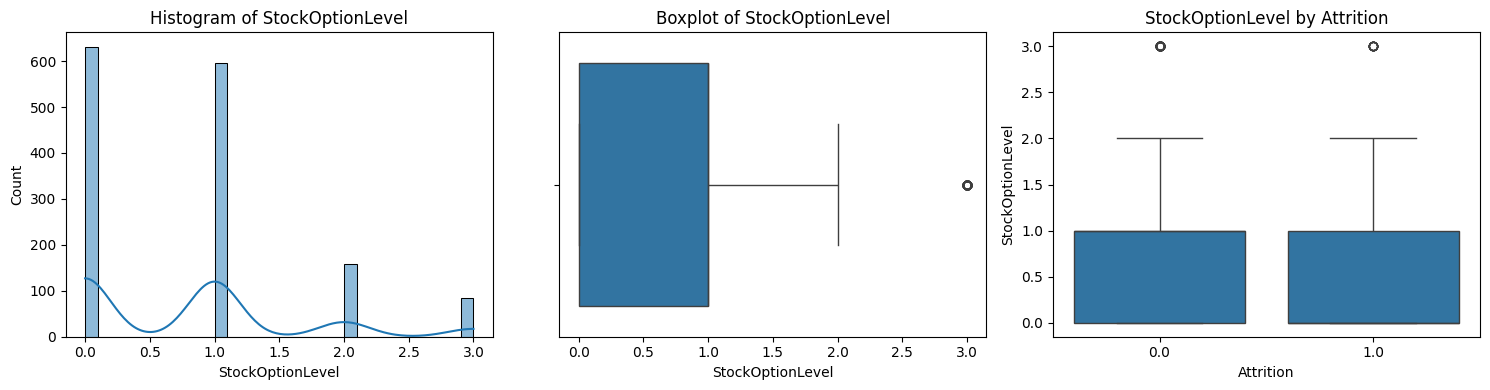

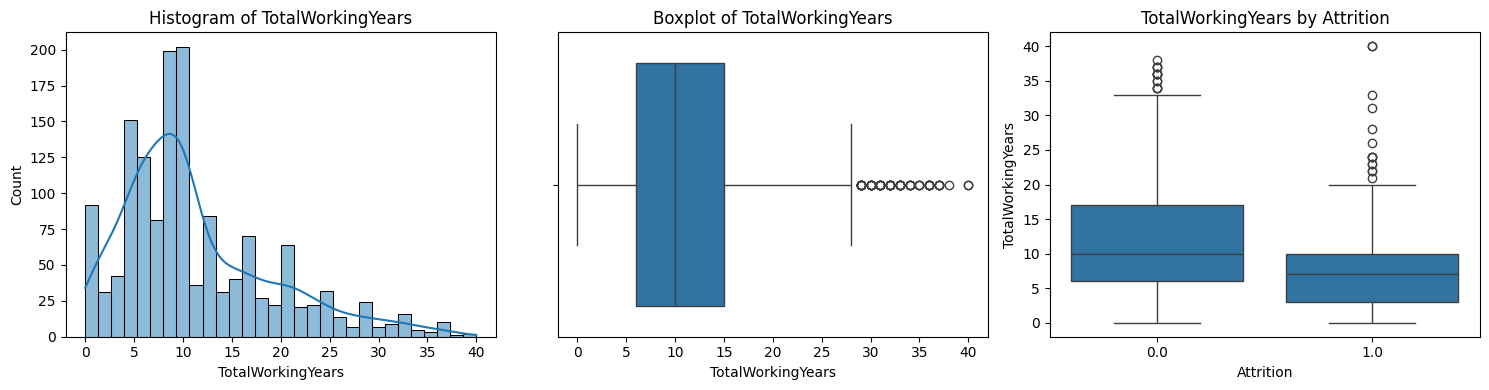

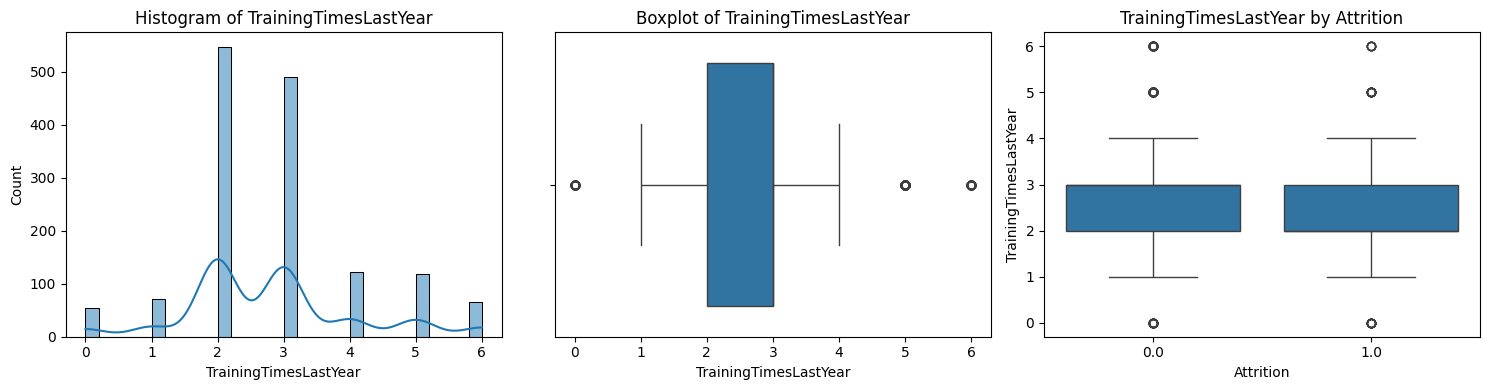

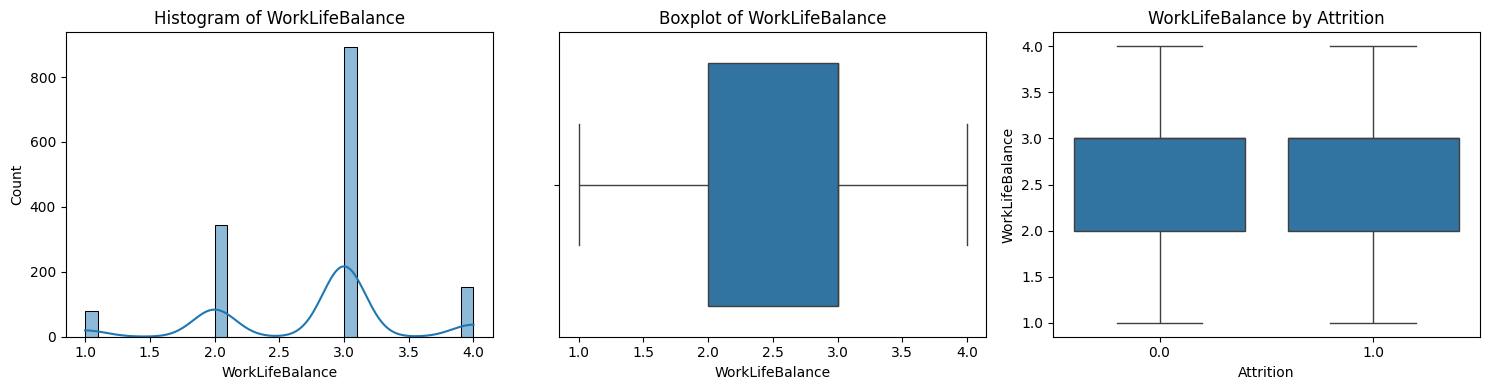

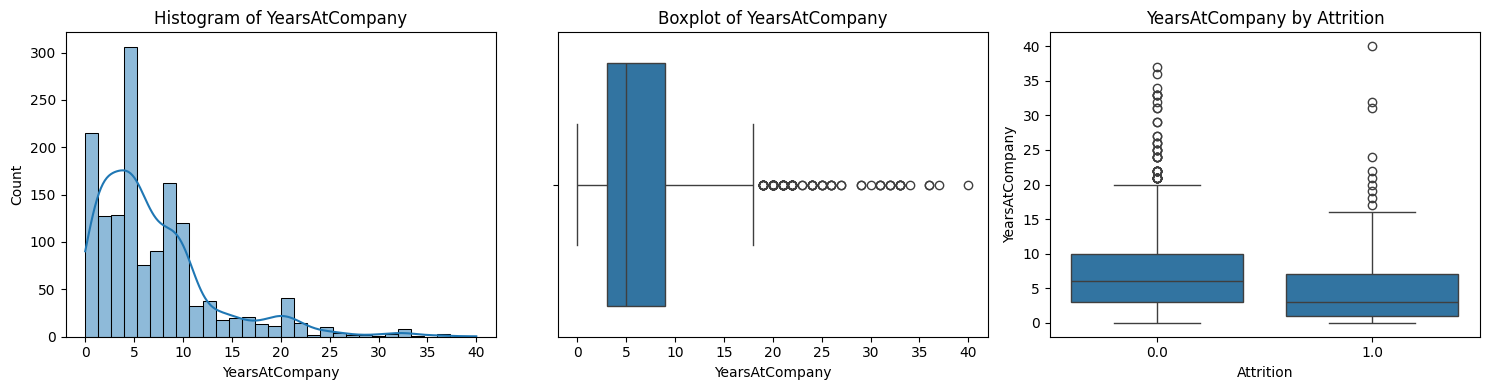

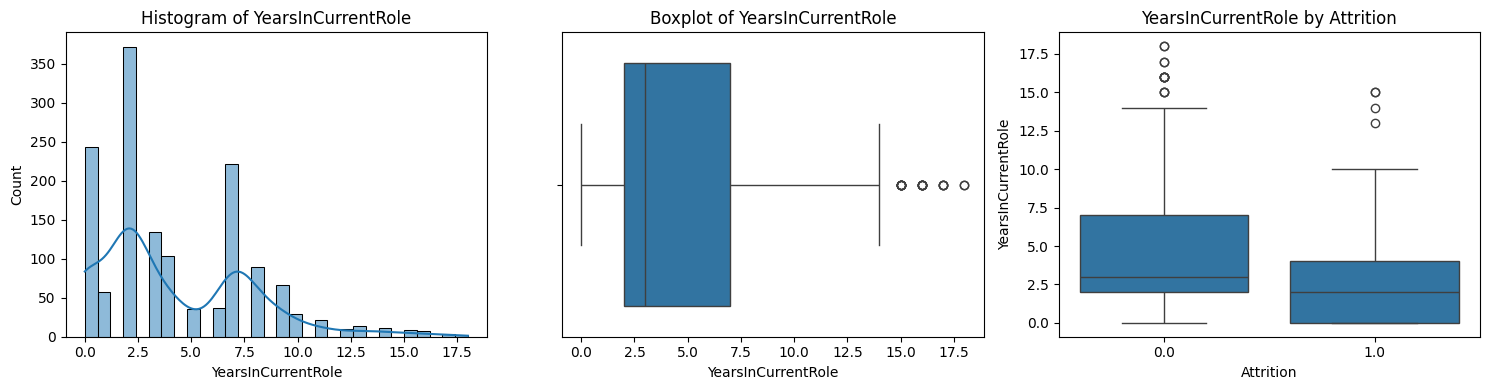

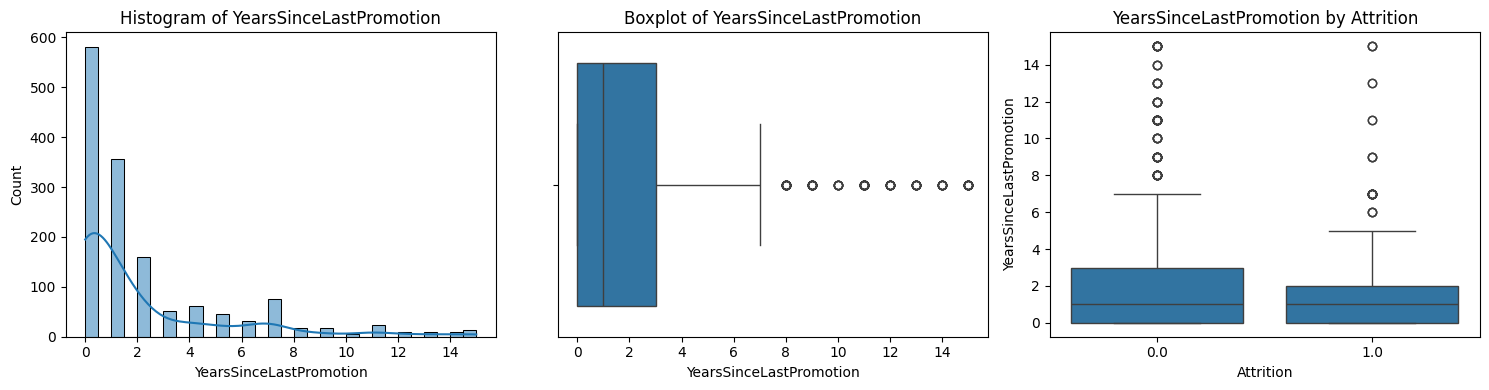

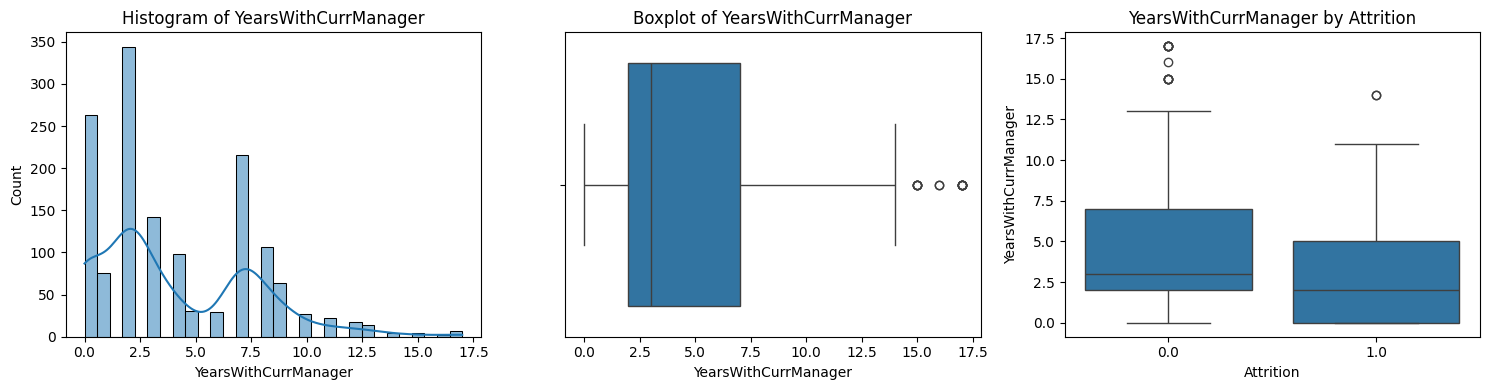

In [11]:
for feature in num_fe:
    numeric_analysis(data, feature, target="Attrition")


📊 Hasil Univariate Analysis – Faktor Attrition

Berdasarkan hasil analisis univariate terhadap fitur numerik, ditemukan beberapa pola penting terkait faktor Attrition:

🔹 Cluster 1: Demografi & Usia
- Mayoritas attrition terjadi pada kelompok usia 25–40 tahun, dengan puncak pada sekitar 35 tahun.

📌 Insight: Hal ini menunjukkan bahwa karyawan yang relatif masih muda cenderung lebih mudah melakukan attrition (mungkin karena masih ingin mencoba peluang lain).

🔹 Cluster 2: Kondisi Pekerjaan (Job-related Factors)
- Job Level: Mayoritas attrition terjadi pada level junior (0–2).
- Monthly Income: Banyak terjadi pada karyawan dengan gaji relatif rendah (2,500–10,000).
- Job Satisfaction: Tingkat kepuasan kerja rendah (skala 0–3) sering dikaitkan dengan attrition.
- Environment Satisfaction: Skor rendah (0–3, rata-rata 2) juga menjadi pemicu kuat.

📌 Insight: Ketidakpuasan terhadap lingkungan kerja dan level pekerjaan junior, ditambah pendapatan rendah, merupakan kombinasi kuat yang mendorong attrition.

🔹 Cluster 3: Lama Bekerja & Pengalaman
- Total Working Years: Mayoritas attrition terjadi pada 0–10 tahun, dengan puncak di sekitar 8 tahun.
- Years At Company: Banyak terjadi pada masa kerja 0–5 tahun.
- Years In Current Role: Rentang 0–4 tahun sering dikaitkan dengan attrition, mungkin karena ingin mencari pengalaman baru.
- Years With Current Manager: Mayoritas attrition terjadi pada 0–5 tahun pertama bekerja dengan manajer baru.

📌 Insight: Faktor pengalaman kerja yang masih relatif singkat, masa adaptasi dengan perusahaan, serta kepemimpinan baru bisa menjadi alasan utama seseorang keluar.

🔹 Cluster 4: Faktor Personal
- Distance From Home juga muncul sebagai variabel penting. Semakin jauh jarak rumah ke kantor, semakin besar kemungkinan karyawan melakukan attrition.

###" Ringkasan Clustering Insight"

1. Demografi (Usia Muda) → Attrition lebih banyak di usia 25–40.

2. Kondisi Pekerjaan → Level junior, gaji rendah, job satisfaction & environment satisfaction rendah.

3. Pengalaman & Masa Kerja → Lama kerja singkat (0–5 tahun), masa kerja dengan manajer baru.

4. Faktor Personal → Jarak rumah yang jauh memengaruhi keputusan attrition.

## Feature Category

In [12]:
cat_fe = data.select_dtypes(exclude=np.number).columns
cat_fe

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### Helper Function for Visualization (Category)

In [13]:
def categorical_analysis(df: pd.DataFrame, cat_features: list[str], target: str = None) -> None:
    """
    Helper function untuk melakukan univariate atau bivariate analysis pada fitur kategorikal.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame yang berisi dataset
    cat_features : list[str]
        List nama kolom kategorikal
    target : str, optional
        Kolom target (misalnya 'Attrition'), default None

    Return
    ------
    None
        Hanya menampilkan plot, summary, dan crosstab jika target disediakan
    """
    for col in cat_features:
        print(f"\n===== Analisis Fitur: {col} =====")
        print(df[col].value_counts(dropna=False))
        print("\nPersentase distribusi:")
        print(df[col].value_counts(normalize=True, dropna=False) * 100)

        if target is not None:
            print(f"\n>>> Perbandingan {col} terhadap {target}:")
            ctab = pd.crosstab(df[col], df[target], margins=True)
            print(ctab)

            print("\n>>> Persentase perbandingan (row %):")
            ctab_pct = pd.crosstab(df[col], df[target], normalize="index") * 100
            print(ctab_pct.round(2))

        plt.figure(figsize=(8,5))
        if target is None:
            sns.countplot(
                data=df,
                x=col,
                order=df[col].value_counts().index,
                palette="Set2"
            )
            plt.title(f"Distribusi {col}")
        else:
            sns.countplot(
                data=df,
                x=col,
                hue=target,
                order=df[col].value_counts().index,
                palette="Set2"
            )
            plt.title(f"Distribusi {col} berdasarkan {target}")

        plt.xticks(rotation=30)
        plt.show()



===== Analisis Fitur: BusinessTravel =====
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Persentase distribusi:
BusinessTravel
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: proportion, dtype: float64

>>> Perbandingan BusinessTravel terhadap Attrition:
Attrition          0.0  1.0   All
BusinessTravel                   
Non-Travel          96   11   107
Travel_Frequently  154   51   205
Travel_Rarely      629  117   746
All                879  179  1058

>>> Persentase perbandingan (row %):
Attrition            0.0    1.0
BusinessTravel                 
Non-Travel         89.72  10.28
Travel_Frequently  75.12  24.88
Travel_Rarely      84.32  15.68


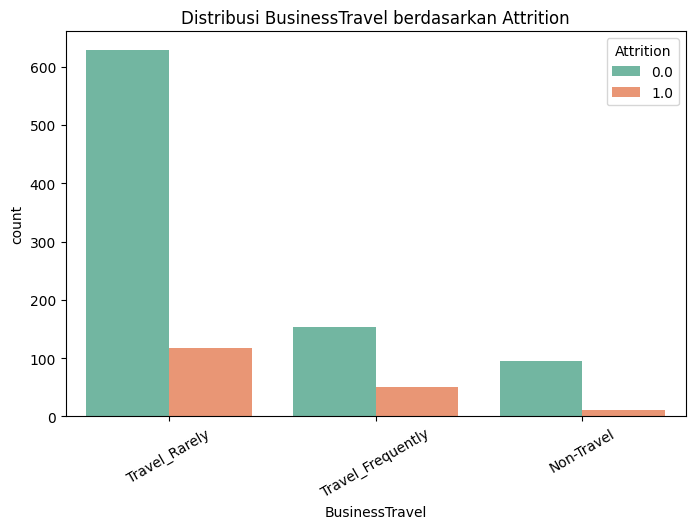


===== Analisis Fitur: Department =====
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Persentase distribusi:
Department
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64

>>> Perbandingan Department terhadap Attrition:
Attrition               0.0  1.0   All
Department                            
Human Resources          32    6    38
Research & Development  594  107   701
Sales                   253   66   319
All                     879  179  1058

>>> Persentase perbandingan (row %):
Attrition                 0.0    1.0
Department                          
Human Resources         84.21  15.79
Research & Development  84.74  15.26
Sales                   79.31  20.69


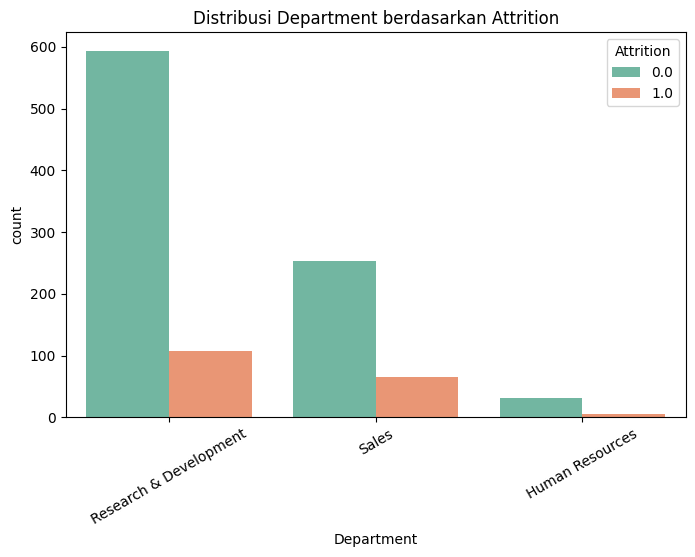


===== Analisis Fitur: EducationField =====
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Persentase distribusi:
EducationField
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: proportion, dtype: float64

>>> Perbandingan EducationField terhadap Attrition:
Attrition         0.0  1.0   All
EducationField                  
Human Resources    13    2    15
Life Sciences     366   70   436
Marketing          96   26   122
Medical           284   46   330
Other              49   10    59
Technical Degree   71   25    96
All               879  179  1058

>>> Persentase perbandingan (row %):
Attrition           0.0    1.0
EducationField                
Human Resources   86.67  13.33
Life Sciences     83.94  16.06
Marketi

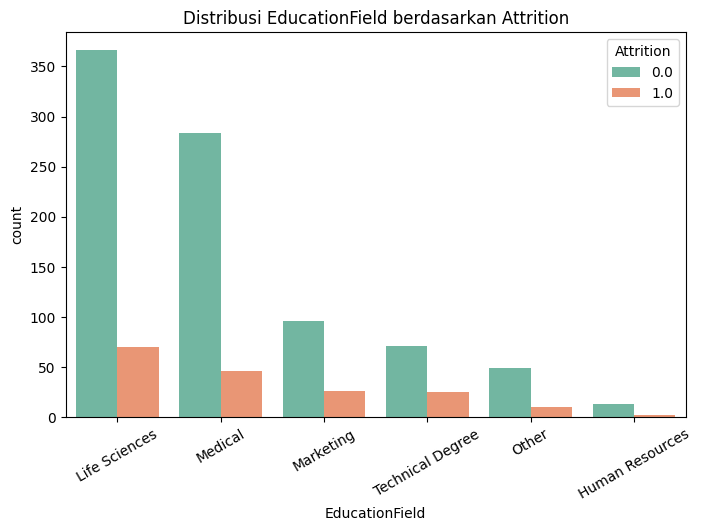


===== Analisis Fitur: Gender =====
Gender
Male      882
Female    588
Name: count, dtype: int64

Persentase distribusi:
Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

>>> Perbandingan Gender terhadap Attrition:
Attrition  0.0  1.0   All
Gender                   
Female     367   71   438
Male       512  108   620
All        879  179  1058

>>> Persentase perbandingan (row %):
Attrition    0.0    1.0
Gender                 
Female     83.79  16.21
Male       82.58  17.42


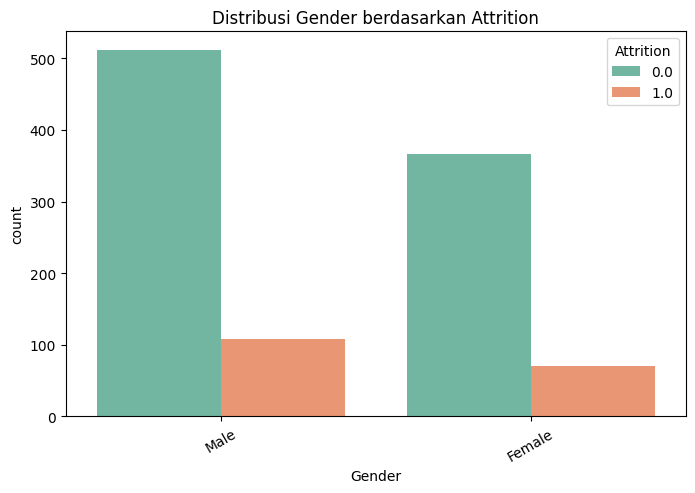


===== Analisis Fitur: JobRole =====
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

Persentase distribusi:
JobRole
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: proportion, dtype: float64

>>> Perbandingan JobRole terhadap Attrition:
Attrition                  0.0  1.0   All
JobRole                                  
Healthcare Representative   80    8    88
Human Resources             24    6    30
La

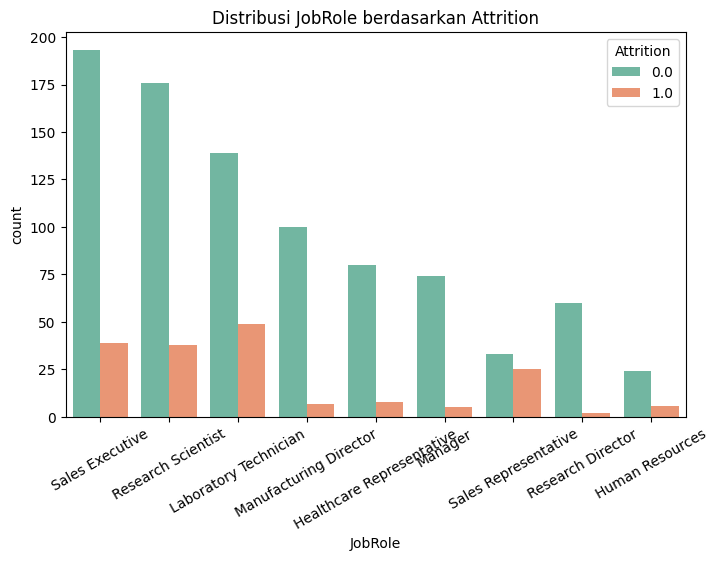


===== Analisis Fitur: MaritalStatus =====
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Persentase distribusi:
MaritalStatus
Married     45.782313
Single      31.972789
Divorced    22.244898
Name: proportion, dtype: float64

>>> Perbandingan MaritalStatus terhadap Attrition:
Attrition      0.0  1.0   All
MaritalStatus                
Divorced       219   23   242
Married        402   62   464
Single         258   94   352
All            879  179  1058

>>> Persentase perbandingan (row %):
Attrition        0.0    1.0
MaritalStatus              
Divorced       90.50   9.50
Married        86.64  13.36
Single         73.30  26.70


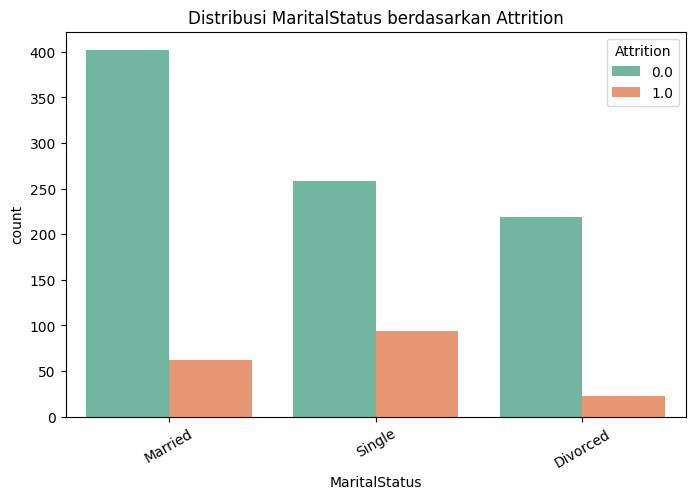


===== Analisis Fitur: Over18 =====
Over18
Y    1470
Name: count, dtype: int64

Persentase distribusi:
Over18
Y    100.0
Name: proportion, dtype: float64

>>> Perbandingan Over18 terhadap Attrition:
Attrition  0.0  1.0   All
Over18                   
Y          879  179  1058
All        879  179  1058

>>> Persentase perbandingan (row %):
Attrition    0.0    1.0
Over18                 
Y          83.08  16.92


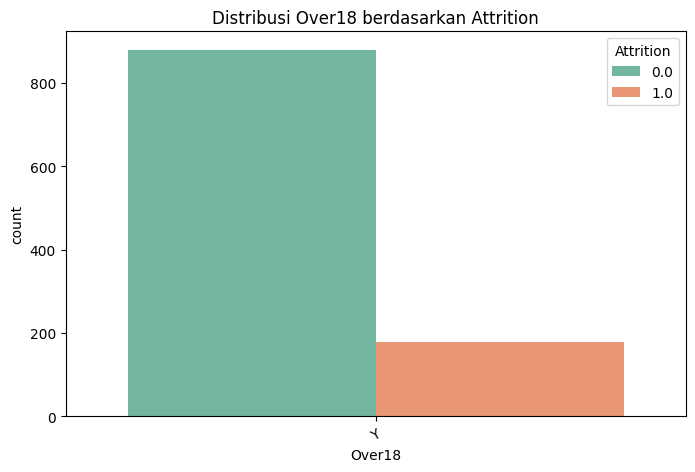


===== Analisis Fitur: OverTime =====
OverTime
No     1054
Yes     416
Name: count, dtype: int64

Persentase distribusi:
OverTime
No     71.70068
Yes    28.29932
Name: proportion, dtype: float64

>>> Perbandingan OverTime terhadap Attrition:
Attrition  0.0  1.0   All
OverTime                 
No         670   81   751
Yes        209   98   307
All        879  179  1058

>>> Persentase perbandingan (row %):
Attrition    0.0    1.0
OverTime               
No         89.21  10.79
Yes        68.08  31.92


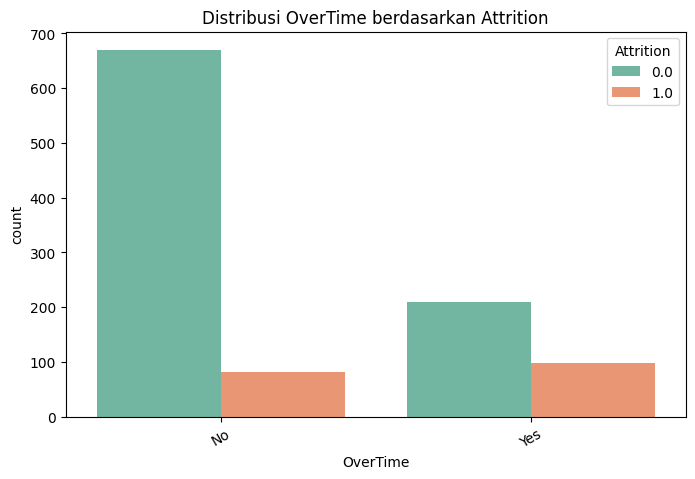

In [14]:
categorical_analysis(df=data, cat_features=cat_fe, target="Attrition")

📌 Kesimpulan Univariate dan bivariate Analysis (Fitur Kategorikal)

Berdasarkan analisis distribusi kategori terhadap Attrition, terdapat beberapa temuan penting:

1. BusinessTravel

- Karyawan dengan frekuensi perjalanan yang jarang justru menunjukkan tingkat attrition tertinggi (65%).
- Hal ini mengindikasikan bahwa kurangnya variasi atau kesempatan perjalanan bisa berhubungan dengan kejenuhan kerja.

2. Department

- Attrition paling banyak terjadi di Research & Development (59%), diikuti oleh Sales (37%).
- Kedua departemen ini mungkin memiliki beban kerja tinggi atau tingkat stres yang lebih besar dibanding departemen lain.

3. Gender

- Mayoritas karyawan yang attrition adalah laki-laki (60%).
- Faktor gender dapat menjadi salah satu aspek penting dalam retensi karyawan.

4. EducationField

- Tingkat attrition tertinggi ada pada bidang Life Sciences (39%) dan Medical (25%).
- Bisa jadi karena bidang ini memiliki karakteristik pekerjaan yang lebih menantang secara teknis maupun emosional.

5. JobRole

- Attrition dominan terjadi pada Laboratory Technician & Research Scientist (48%) serta role di bidang Sales (35%).
- Ini menunjukkan bahwa baik pekerjaan berbasis riset maupun sales sama-sama memiliki risiko attrition yang tinggi.

6. MaritalStatus

- Karyawan dengan status Single (52%) memiliki tingkat attrition tertinggi, diikuti oleh Married (34%).
- Status pernikahan tampaknya mempengaruhi stabilitas dan retensi karyawan.

7. OverTime

- Attrition paling tinggi terjadi pada karyawan yang sering lembur (54%).
- Hal ini menunjukkan bahwa beban kerja berlebih sangat mempengaruhi keputusan karyawan untuk keluar.

🎯 Insight Utama

- Faktor beban kerja (overtime, job role tertentu, dan department) tampaknya sangat berpengaruh terhadap keputusan karyawan untuk resign.

- Faktor personal seperti status pernikahan dan gender juga ikut memberi kontribusi pada tingkat attrition.

- Attrition lebih tinggi di bidang pekerjaan dengan tuntutan tinggi (R&D, Sales, Life Sciences, Medical).

### 📊 Kesimpulan Univariate Analysis (Numerik + Kategorikal)
1. Faktor Demografis & Karakteristik Personal

- Gender: Mayoritas karyawan yang mengalami attrition adalah laki-laki (~60%).
- Marital Status: Tingkat attrition lebih tinggi pada karyawan single (52%), dibanding married.
- Usia (numerik): Karyawan yang lebih muda (early career) cenderung memiliki tingkat attrition lebih tinggi.

👉 Interpretasi: Karyawan muda dan masih single cenderung lebih mobile, mencari pengalaman baru, atau kurang memiliki keterikatan terhadap perusahaan.

2. Faktor Pekerjaan (Role, Department, dan Beban Kerja)

- Department: Attrition dominan pada Research & Development (59%) dan Sales (37%).
- Job Role: Tingkat attrition tertinggi pada Laboratory Technician & Research Scientist (48%), serta role di bidang Sales (35%).
- OverTime: Karyawan dengan jam kerja lembur tinggi menyumbang attrition terbesar (54%).
- YearsAtCompany / YearsInCurrentRole (numerik): Attrition lebih tinggi pada karyawan dengan masa kerja singkat (<3 tahun).

👉 Interpretasi: Faktor beban kerja tinggi, tekanan di bidang R&D/Sales, serta masa kerja singkat merupakan indikator kuat terjadinya attrition.

3. Faktor Pendidikan & Perjalanan

- EducationField: Attrition banyak terjadi pada karyawan dari Life Sciences (39%) dan Medical (25%).
- BusinessTravel: Menariknya, karyawan yang jarang melakukan perjalanan justru menunjukkan tingkat attrition tertinggi (65%).

👉 Interpretasi: Bidang pekerjaan tertentu (Life Sciences, Medical) lebih rentan terhadap turnover. Kurangnya variasi atau kesempatan exposure (misalnya perjalanan bisnis) dapat memengaruhi kepuasan kerja.

4. Faktor Kompensasi & Benefit (Numerik)

- Monthly Income: Attrition lebih tinggi pada karyawan dengan gaji relatif rendah.
- StockOptionLevel: Karyawan dengan stock option rendah lebih banyak yang keluar dibandingkan mereka yang punya insentif lebih besar.
- JobSatisfaction & EnvironmentSatisfaction: Skor kepuasan rendah berhubungan dengan attrition yang lebih tinggi.

👉 Interpretasi: Faktor kompensasi dan kepuasan kerja berperan penting dalam retensi. Gaji rendah, insentif minim, serta kepuasan kerja yang rendah menjadi pemicu utama.

### 🎯 Insight Utama (Big Picture)

- Attrition lebih tinggi pada karyawan muda, single, dengan kompensasi rendah, serta masa kerja singkat.

- Faktor pekerjaan seperti jam lembur, departemen/role dengan beban kerja tinggi (R&D, Sales), dan bidang studi tertentu (Life Sciences, Medical) memperbesar risiko attrition.

- Faktor kompensasi dan kepuasan kerja (income, stock options, job satisfaction) sangat memengaruhi keputusan karyawan untuk bertahan atau keluar.


👉 Jadi secara keseluruhan, attrition dipengaruhi kombinasi faktor personal, beban kerja, kompensasi, dan kepuasan kerja.
Artinya, strategi retensi harus menyasar pada:

- Kompensasi & insentif yang lebih adil,

- Mengelola beban kerja (terutama overtime),

- Program engagement untuk karyawan muda & single,

- Meningkatkan kepuasan kerja & lingkungan kerja.

In [15]:
data.drop(columns=['Over18'], inplace=True)

## Data Preparation / Preprocessing

### Feature Selection

Berdasarkan hasil ekplorasi di atas didapatkan beberapa fitur yang memiliki hubungan atau keterkaitan dengan "Attrintion". Beberapa fitur tersebut akan digunakan untuk melakukan pendekatan machine learning dengan algoritma K-Prototypes.

Feature Selection
Numeric :
-	Age
-	TotalWorkingYears
-	YearsWithCurrManager
-	Distance From Home
-	EnvironmentSatisfaction

Categorical :
-	Department
-	Gender
-	MaritialStatus
- BussinesTravel

Fitur yang dipilih sudah berdasarkan nilai korelasi dan hasil analisis univariate atau bivariate.


In [16]:
feature_selection_numeric = ['Age','TotalWorkingYears','YearsWithCurrManager','JobLevel','YearsInCurrentRole','YearsAtCompany','MonthlyIncome']
feature_selection_categorical = ['Department','Gender','MaritalStatus','BusinessTravel']
combine = feature_selection_numeric + feature_selection_categorical
data_combine = data[combine]
data_combine['Attrition'] = data['Attrition']

In [17]:
# Cek VIF
def calculate_vif(df: pd.DataFrame, features: list[str]) -> pd.DataFrame:
    """
    Hitung Variance Inflation Factor (VIF) untuk mendeteksi multikolinearitas
    pada fitur numerik.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame berisi dataset.
    features : list[str]
        Daftar nama kolom numerik yang ingin diuji.

    Returns
    -------
    pd.DataFrame
        DataFrame berisi fitur dan nilai VIF masing-masing.
    """
    X = df[features].copy()

    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(len(features))]
    return vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

In [18]:
vif_result = calculate_vif(data, feature_selection_numeric)
display(vif_result)


,feature,VIF
0,JobLevel,45.085071
1,MonthlyIncome,29.884006
2,TotalWorkingYears,11.052245
3,YearsAtCompany,9.203284
4,Age,8.586029
5,YearsWithCurrManager,6.361021
6,YearsInCurrentRole,6.153264


In [19]:
# feature_selection_numeric.remove('JobLevel')
# vif_result = calculate_vif(data, feature_selection_numeric)
# display(vif_result)


In [20]:
# feature_selection_numeric.remove('Age')
# vif_result = calculate_vif(data, feature_selection_numeric)
# display(vif_result)


In [21]:
def apply_pca(df: pd.DataFrame, n_components: float | int = 0.95, random_state: int = 42):
    """
    Melakukan PCA pada data numerik.

    Parameters
    ----------
    df : pd.DataFrame
        Data numerik untuk dilakukan PCA
    n_components : float atau int, default=0.95
        - Jika float (0 < n_components <= 1), maka PCA akan memilih jumlah komponen
          yang mempertahankan minimal proporsi variance tersebut (misal 0.95 = 95% variance).
        - Jika int, maka jumlah komponen ditentukan sesuai angka tersebut.
    random_state : int
        Random seed agar hasil konsisten

    Returns
    -------
    pca_df : pd.DataFrame
        Data hasil transformasi PCA dalam bentuk DataFrame
    pca_model : PCA object
        Model PCA untuk analisis lebih lanjut (misalnya melihat loadings)
    explained_var : pd.Series
        Proporsi variance yang dijelaskan tiap komponen
    """

    pca = PCA(n_components=n_components, random_state=random_state)
    pca_data = pca.fit_transform(df)

    # Buat nama kolom PC1, PC2, dst.
    col_names = [f"PC{i+1}" for i in range(pca_data.shape[1])]
    pca_df = pd.DataFrame(pca_data, columns=col_names, index=df.index)

    explained_var = pd.Series(pca.explained_variance_ratio_, index=col_names)

    return pca_df, pca, explained_var

In [22]:
def pca_summary(X, n_components=None, scale=True):
    """
    Fungsi untuk melakukan PCA, menampilkan explained variance,
    dan membuat scree plot.

    Parameters
    ----------
    X : pd.DataFrame atau np.ndarray
        Data numerik.
    n_components : int, optional
        Jumlah komponen PCA. Jika None maka otomatis = jumlah fitur.
    scale : bool, default=True
        Apakah data perlu di-scaling (standarisasi).

    Returns
    -------
    pca_df : pd.DataFrame
        DataFrame berisi explained variance per komponen.
    pca_model : PCA object
        Model PCA yang sudah fit.
    """
    # Scaling dulu (opsional, biasanya penting untuk PCA)
    if scale:
        X_scaled = StandardScaler().fit_transform(X)
    else:
        X_scaled = X

    # Fit PCA
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)

    # Buat dataframe untuk summary
    explained_var = pca.explained_variance_ratio_
    cum_var = np.cumsum(explained_var)

    pca_df = pd.DataFrame({
        'PC': [f'PC{i+1}' for i in range(len(explained_var))],
        'Explained Variance': explained_var,
        'Cumulative Variance': cum_var
    })

    # Plot scree plot
    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(explained_var)+1), explained_var, 'o-', label="Explained Variance")
    plt.plot(range(1, len(explained_var)+1), cum_var, 's--', label="Cumulative Variance")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Explained")
    plt.title("PCA Scree Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

    return pca_df, pca

### Feature Scalling

In [23]:
scaling = StandardScaler()
numeric_scaling = scaling.fit_transform(data[feature_selection_numeric])

data_num = pd.DataFrame(numeric_scaling, columns=[f"{feature}_Scaling" for feature in feature_selection_numeric])
data_num

,Age_Scaling,TotalWorkingYears_Scaling,YearsWithCurrManager_Scaling,JobLevel_Scaling,YearsInCurrentRole_Scaling,YearsAtCompany_Scaling,MonthlyIncome_Scaling
0,0.117845,-0.550208,-0.595227,-0.961486,-0.615492,-0.164613,-0.746210
1,0.008343,0.478316,-1.155935,-0.057788,-1.167687,-0.981014,-0.366724
2,1.541369,0.864013,0.806541,-0.961486,-1.167687,0.488508,-0.858824
3,0.555852,1.506840,1.086895,1.749610,-0.063296,2.121310,1.492040
4,0.336849,1.121144,-0.595227,-0.961486,-0.339394,-0.327893,-0.956564
...,...,...,...,...,...,...,...
1465,0.117845,-0.164511,-1.155935,0.845911,-1.167687,-0.981014,0.288561
1466,1.431867,0.992578,1.927956,0.845911,1.869389,1.141629,1.437645
1467,-0.977174,-1.321601,-1.155935,-0.961486,-0.891589,-0.981014,-0.847350
1468,0.336849,-0.678774,-1.155935,-0.961486,-0.615492,-0.491174,-0.628710


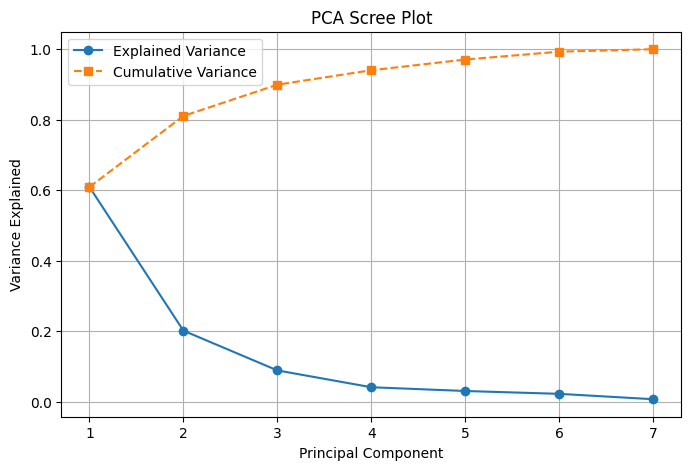

    PC  Explained Variance  Cumulative Variance
0  PC1            0.609091             0.609091
1  PC2            0.201542             0.810633
2  PC3            0.088757             0.899391
3  PC4            0.040999             0.940390
4  PC5            0.030351             0.970741
5  PC6            0.022264             0.993005
6  PC7            0.006995             1.000000


In [24]:
pca_df, pca_model = pca_summary(data_num, scale=True)
print(pca_df)

In [25]:
data_pca, pca_model, explained_var = apply_pca(data_num, n_components=3)

print("Jumlah komponen terpilih:", data_pca.shape[1])
print("Explained variance tiap komponen:")
print(explained_var)

Jumlah komponen terpilih: 3
Explained variance tiap komponen:
PC1    0.609091
PC2    0.201542
PC3    0.088757
dtype: float64


### Feature Encoding

In [26]:
# BinerEncoding
gender_encoding = data['Gender'].replace({"Male": 1, "Female": 0})
# display(data.Gender.value_counts())

# OneHotEncoding
list_oneHot = ['Department','MaritalStatus','BusinessTravel']
data_onehot = pd.get_dummies(data[list_oneHot], drop_first=False)

# display(data_onehot.head())

data_encoding = pd.concat([gender_encoding, data_onehot], axis=1)
data_final = pd.concat([data_pca, data_encoding], axis=1)


## Modeling

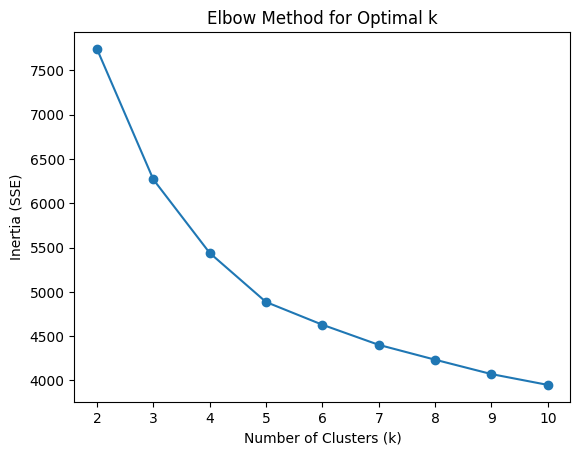

In [27]:
X = data_final.copy()

inertia = []
K_range = range(2, 11)  # coba cluster dari 2 sampai 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()


## Evaluation

In [28]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    print(f"k = {k}, Silhouette Score = {sil_score:.3f}")

k = 2, Silhouette Score = 0.347
k = 3, Silhouette Score = 0.258
k = 4, Silhouette Score = 0.269
k = 5, Silhouette Score = 0.205
k = 6, Silhouette Score = 0.186
k = 7, Silhouette Score = 0.173
k = 8, Silhouette Score = 0.167
k = 9, Silhouette Score = 0.158
k = 10, Silhouette Score = 0.158


## Final Model

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data_combine["Cluster"] = kmeans.fit_predict(X)

## Visualisation

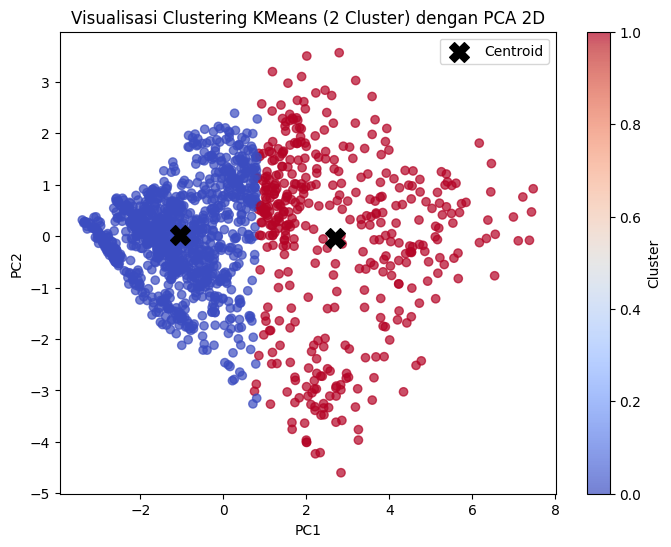

In [30]:
data_pca = data_combine.copy()
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

data_pca["PC1"] = X_pca[:, 0]
data_pca["PC2"] = X_pca[:, 1]

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    data_pca["PC1"],
    data_pca["PC2"],
    c=data_pca["Cluster"],
    cmap="coolwarm",
    alpha=0.7
)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c="black",
    marker="X",
    s=200,
    label="Centroid"
)

plt.title("Visualisasi Clustering KMeans (2 Cluster) dengan PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.colorbar(scatter, label="Cluster")
plt.show()


## Summary

In [ ]:
# _ = joblib.dump(data_combine, 'data_clustered.joblib')
# _ = joblib.dump(summary, 'data_summary.joblib')

In [32]:
joblib.dump(kmeans, "kmeans_model.joblib")

['kmeans_model.joblib']

## Kesimpulan Clustering